Demonstrate a Gaussian process which, when taking a log, goes to zero where there isn't data

Prior kernel: 1**2 * RBF(length_scale=10)


/home/thomas/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


MLE kernel  : 31.6**2 * RBF(length_scale=7.91)


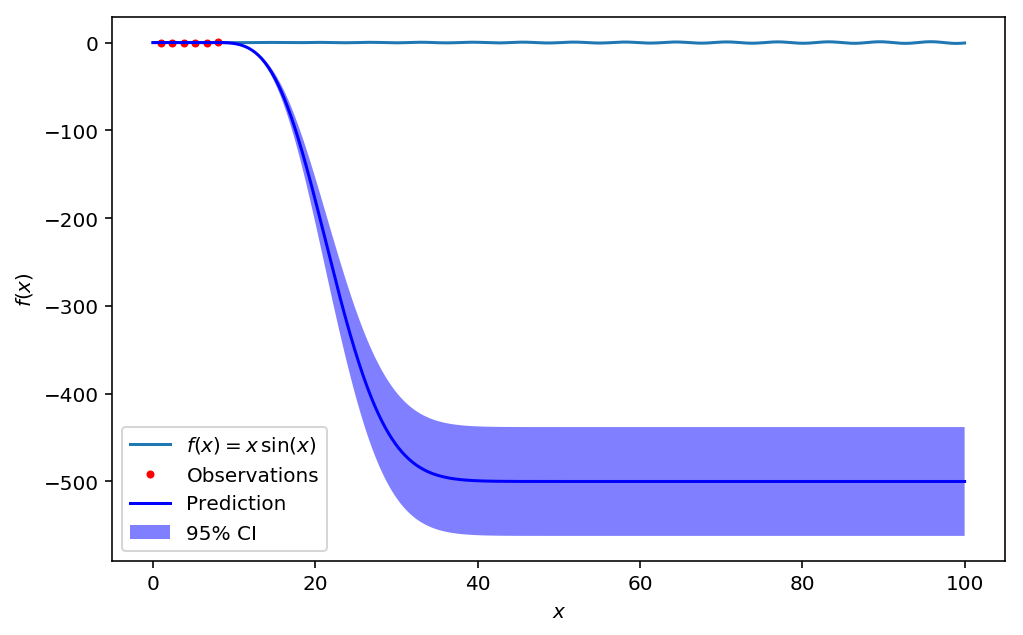

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel


def f_target(x):
    return 0.01 * x * np.sin(x)


def _reshapex(x):
    ''' Reshape an x value to include a second dimension '''
    assert len(x.shape) == 1
    return x.reshape((x.shape[0], 1))


# The points and values which we have sampled
x = np.linspace(1, 8, 6)
y = f_target(x)

# Our view of the prior mean
prior_mean = -500

# Fit a gaussian process
# The tuples in the arguments to the kernels indicate the valid range of the parameters
# when calling 'fit'
kernel = ConstantKernel(1, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
print('Prior kernel:', kernel)

# n_restarts_optimizer is trying to avoid getting stuck in a local minimum when looking for
# hyperparameter values. If the hyperparameters were set *exactly*, then this could be left
# at the default value, which is 0.
regressor = GaussianProcessRegressor(kernel, n_restarts_optimizer=20)
regressor.fit(_reshapex(x), y - prior_mean)
print('MLE kernel  :', regressor.kernel_)


# Evaluate our GP at many more points - include the uncertainty at every point
x_eval = np.linspace(0, 100, 500)
y_eval, sigma_eval = regressor.predict(_reshapex(x_eval), return_std=True)
y_eval += prior_mean

plt.figure(figsize=(8, 5))
plt.plot(x_eval, f_target(x_eval), label=r'$f(x) = x\,\sin(x)$')
plt.plot(x, y, 'r.', label='Observations')
plt.plot(x_eval, y_eval, 'b-', label='Prediction')
plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
         np.concatenate([(y_eval - 1.96 * sigma_eval),
                         (y_eval + 1.96 * sigma_eval)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend();

Similar plot in log space...

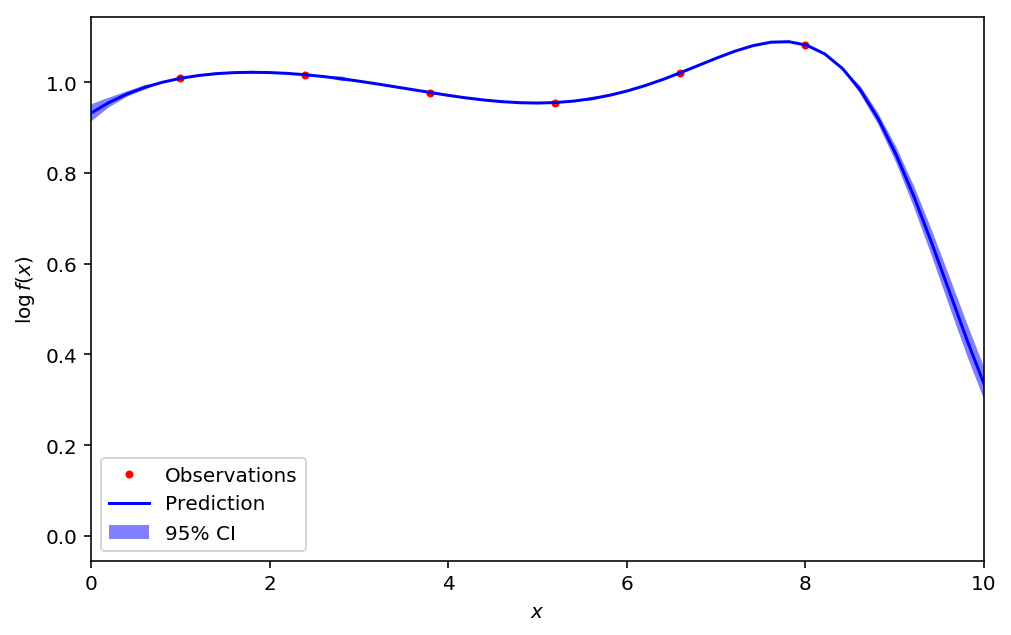

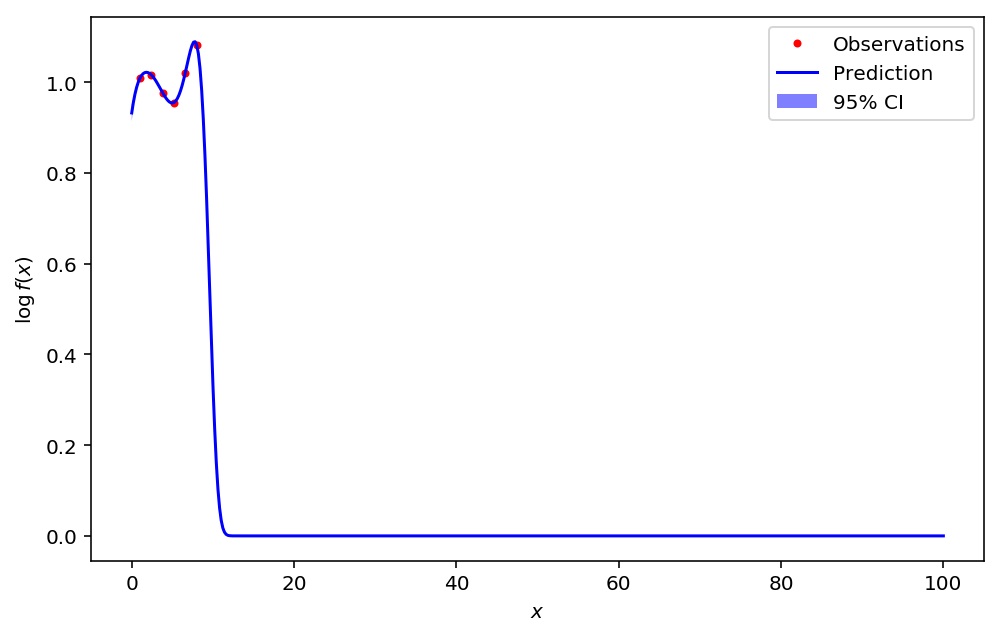

In [2]:
plt.figure(figsize=(8, 5))
plt.plot(x, np.exp(y), 'r.', label='Observations')
plt.plot(x_eval, np.exp(y_eval), 'b-', label='Prediction')
plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
         np.concatenate([np.exp(y_eval - 1.96 * sigma_eval),
                         np.exp(y_eval + 1.96 * sigma_eval)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$\log\,f(x)$')
plt.legend();
plt.xlim(0, 10)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(x, np.exp(y), 'r.', label='Observations')
plt.plot(x_eval, np.exp(y_eval), 'b-', label='Prediction')
plt.fill(np.concatenate([x_eval, x_eval[::-1]]),
         np.concatenate([np.exp(y_eval - 1.96 * sigma_eval),
                         np.exp(y_eval + 1.96 * sigma_eval)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$\log\,f(x)$')
plt.legend();
plt.show()